In [71]:
%matplotlib inline
import random
import networkx as nx
import matplotlib.pyplot as plt

In [300]:
class KnotsMap:

    def __init__(self, num_knots, max_connections, set_connections=None):
        
        self.num_knots = num_knots
        self.max_connections = max_connections
        self.graph = nx.Graph()
        self.agents = {}
        self.infected_knots = set()

        # Add knots to the graph and assign labels
        for knot in range(num_knots):
            self.graph.add_node(knot, label=str(knot))

        # Set connections for each knot
        if set_connections is not None:
            self.non_randomize_connections(set_connections)
        else:
            self.randomize_connections()


    def set_connections(self, knot, connections):
        
        if knot not in self.graph.nodes:
            raise ValueError(f"Invalid knot: {knot}. Knot does not exist.")

        if not set(connections).issubset(self.graph.nodes):
            raise ValueError("Invalid connections. Some connections do not exist as knots.")

        self.graph.add_edges_from((knot, connection) for connection in connections)
        
    def non_randomize_connections(self, set_connections):
        
        for knot in self.graph.nodes:
            available_knots = list(self.graph.nodes - {knot})
            random.shuffle(available_knots)

            connections = []

            for neighbor in available_knots:
                if len(connections) >= set_connections:
                    break

                if len(list(self.graph.neighbors(knot))) >= set_connections:
                    break

                if len(list(self.graph.neighbors(neighbor))) < set_connections:
                    connections.append(neighbor)
                    self.graph.add_edge(knot, neighbor)

            self.set_connections(knot, connections)
            
    def randomize_connections(self):
        
        for knot in self.graph.nodes:
            available_knots = list(self.graph.nodes - {knot})
            random.shuffle(available_knots)

            max_node_connections = random.randint(1, self.max_connections)
            connections = []

            for neighbor in available_knots:
                if len(connections) >= max_node_connections:
                    break

                if len(list(self.graph.neighbors(knot))) >= max_node_connections:
                    break

                if len(list(self.graph.neighbors(neighbor))) < self.max_connections:
                    connections.append(neighbor)
                    self.graph.add_edge(knot, neighbor)

            self.set_connections(knot, connections)
            
    def create_agent(self, knot, agent_id):
        
        if knot not in self.graph.nodes:
            raise ValueError(f"Invalid knot: {knot}. Knot does not exist.")

        self.agents[agent_id] = knot

    def move_agent(self, agent_id, new_knot):
        
        if agent_id not in self.agents:
            raise ValueError(f"Invalid agent: {agent_id}. Agent does not exist.")

        if new_knot not in self.graph.nodes:
            raise ValueError(f"Invalid knot: {new_knot}. Knot does not exist.")

        self.agents[agent_id] = new_knot

    def visualize_map(self):
        
        pos = nx.spring_layout(self.graph, seed=1)
        nx.draw_networkx(self.graph, pos, with_labels=False, node_size=1500, node_color=[('#d3b2a7' if knot in self.infected_knots else '#ADD8E6') for knot in self.graph.nodes])
        nx.draw_networkx_labels(self.graph, pos, labels={knot: str(knot) for knot in self.graph.nodes})


        # Draw agents with arrows and labels
        ax = plt.gca()
        for agent_id, knot in self.agents.items():
            agent_label = "Agent " + str(agent_id)
            ax.annotate(agent_label, xy=pos.get(knot), xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.3),  
            bbox=dict(boxstyle="round", fc="yellow"))
            
        plt.axis("off")
        plt.show()
        
    def display_connection_paths(self, knot):
        connected_knots = list(self.graph.neighbors(knot))

        subgraph = self.graph.subgraph([knot] + connected_knots)

        pos = nx.spring_layout(subgraph, seed=1)
        nx.draw_networkx(subgraph, pos, with_labels=True, node_size=1500, node_color=[('#d3b2a7' if knot in self.infected_knots else '#ADD8E6') for knot in subgraph.nodes])

        plt.axis("off")
        plt.show()
        
    def print_all_connections(self):
        for knot in self.graph.nodes:
            connected_knots = list(self.graph.neighbors(knot))
            print(f"Connections for Knot {knot}:")
            for connected_knot in connected_knots:
                print(f"- Knot {knot} is connected to Knot {connected_knot}")
            print()  # Add an empty line between each knot's connections

    def set_infection_status(self, knot, infected):
        
        if knot not in self.graph.nodes:
            raise ValueError(f"Invalid knot: {knot}. Knot does not exist.")

        if infected:
            self.infected_knots.add(knot)
        else:
            self.infected_knots.discard(knot)
            
    def get_possible_destinations(self, agent_id):
        if agent_id not in self.agents:
            raise ValueError(f"Invalid agent: {agent_id}. Agent does not exist.")

        current_knot = self.agents[agent_id]
        possible_destinations = list(self.graph.neighbors(current_knot))
        return possible_destinations

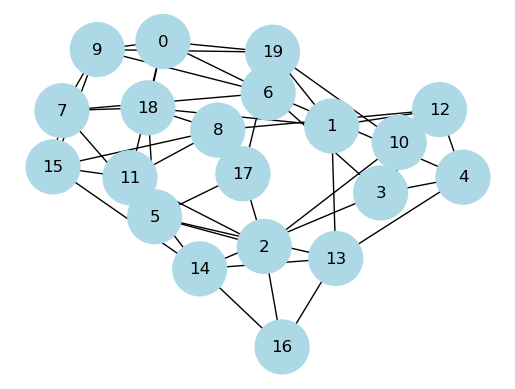

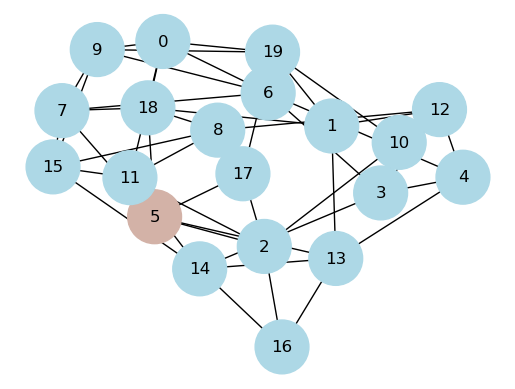

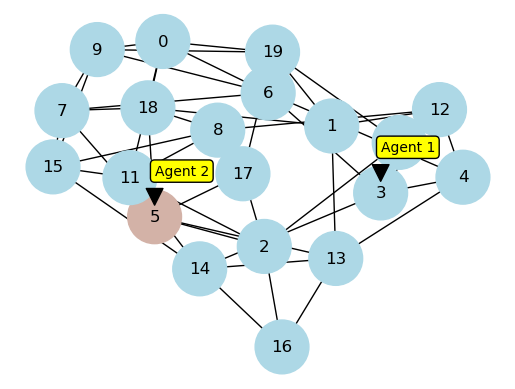

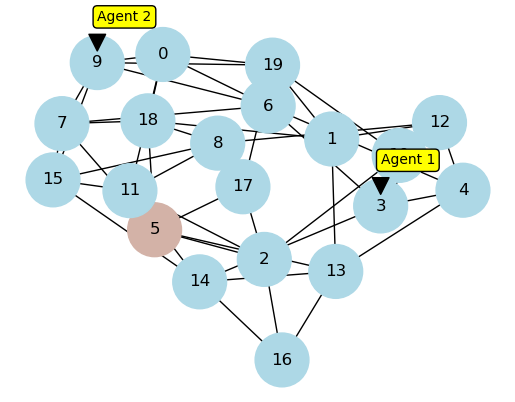

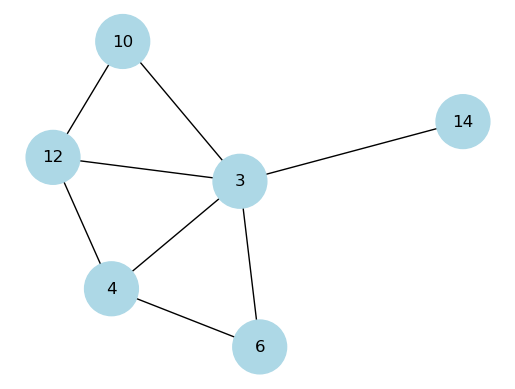

Connections for Knot 0:
- Knot 0 is connected to Knot 19
- Knot 0 is connected to Knot 11
- Knot 0 is connected to Knot 6
- Knot 0 is connected to Knot 9
- Knot 0 is connected to Knot 18

Connections for Knot 1:
- Knot 1 is connected to Knot 18
- Knot 1 is connected to Knot 13
- Knot 1 is connected to Knot 19
- Knot 1 is connected to Knot 12

Connections for Knot 2:
- Knot 2 is connected to Knot 10
- Knot 2 is connected to Knot 5
- Knot 2 is connected to Knot 16
- Knot 2 is connected to Knot 11
- Knot 2 is connected to Knot 17

Connections for Knot 3:
- Knot 3 is connected to Knot 14
- Knot 3 is connected to Knot 10
- Knot 3 is connected to Knot 12
- Knot 3 is connected to Knot 4
- Knot 3 is connected to Knot 6

Connections for Knot 4:
- Knot 4 is connected to Knot 3
- Knot 4 is connected to Knot 6
- Knot 4 is connected to Knot 12
- Knot 4 is connected to Knot 13

Connections for Knot 5:
- Knot 5 is connected to Knot 2
- Knot 5 is connected to Knot 17
- Knot 5 is connected to Knot 7
- 

[14, 10, 12, 4, 6]

In [301]:
# Generate the knots map
knots_map = KnotsMap(20, 5)

knots_map.randomize_connections()

knots_map.visualize_map()

knots_map.set_infection_status(5, True)

knots_map.visualize_map()

knots_map.create_agent(3, '1')
knots_map.create_agent(5, '2')

knots_map.visualize_map()

knots_map.move_agent('2', 9)

knots_map.visualize_map()

knots_map.display_connection_paths(3)

knots_map.print_all_connections()

knots_map.get_possible_destinations('1')

In [ ]:
'''



'''